In [59]:
# Code used for Win Rate Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%store -r cg
%store -r magoppres

In [8]:
cg = cg # Defining cg 
magoppres = magoppres

In [10]:
cg.head()

,game_order,event,site,white_title,white_rating_diff,white_elo,white,result,black,black_elo,black_rating_diff,black_title,winner_loser_elo_diff,eco,termination,time_control,utc_date,utc_time,variant,magnus_result
0,105,Lichess Titled Arena,https://lichess.org/KEvLWfdH,GM,58.0,2500,Magnus Carlsen,1-0,jsalomon,2532,-13.0,GM,-32,E47,Normal,60+0,2017.12.14,21:00:02,Standard,lost
1,104,Lichess Titled Arena,https://lichess.org/9YoOXtxp,IM,17.0,2420,Yoseph Taher,1-0,Magnus Carlsen,2558,-65.0,GM,-138,B01,Time forfeit,60+0,2017.12.14,21:01:10,Standard,lost
2,103,Lichess Titled Arena,https://lichess.org/yh0IxjPf,FM,-17.0,2754,gnejs,0-1,Magnus Carlsen,2493,73.0,GM,-261,B01,Normal,60+0,2017.12.14,21:04:13,Standard,lost
3,102,Lichess Titled Arena,https://lichess.org/qcHWzltq,GM,61.0,2566,Magnus Carlsen,1-0,Toivo Keinänen,2755,-16.0,IM,-189,A01,Normal,60+0,2017.12.14,21:06:30,Standard,lost
4,101,Lichess Titled Arena,https://lichess.org/HhV5RN5e,GM,9.0,2627,Magnus Carlsen,1-0,AusCub,2275,-4.0,NM,352,A01,Normal,60+0,2017.12.14,21:07:57,Standard,lost


(array([2141., 1612., 2202., 2488., 3201., 1798.]),
 array([   0, 2700, 2800, 2900, 3000, 3100, 3300]),
 <BarContainer object of 6 artists>)

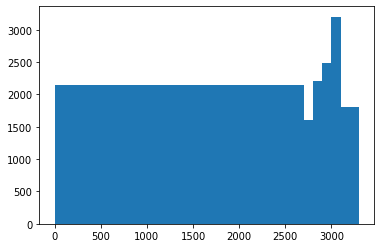

In [3]:
#Each bin has over 1600 games so I decide to split the data like this
plt.hist(magoppres.opp_elo,bins=[0,2700,2800,2900,3000,3100,3300])

In [58]:
# Converts a number of wins, losses, and ties to a fractional score (fscore)
def fscore(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

# Used to shorten my code and reduce a lot of character repitition, vc short for value counts
def vc(df,cond):
    return df[cond].magnus_result.value_counts()

def vco(df): # vco short for value counts overall
    return df.magnus_result.value_counts()


In [37]:
print('Overall win percentage: ',fscore(vco(cg)))
print('Black win percentage: ',fscore(vc(cg,cg.black=='Magnus Carlsen')))
print('White win percentage: ',fscore(vc(cg,cg.white=='Magnus Carlsen')))
# Significant 5% difference between black and white

Overall win percentage:  0.7188662401428358
Black win percentage:  0.6903731343283582
White win percentage:  0.7471818451498072


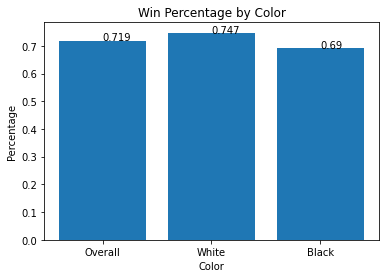

In [38]:
x = ['Overall','White','Black']
y = [fscore(vco(cg)),fscore(vc(cg,cg.white=='Magnus Carlsen')),fscore(vc(cg,cg.black=='Magnus Carlsen'))]
plt.bar(x,y)
plt.title('Win Percentage by Color')
plt.xlabel('Color')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

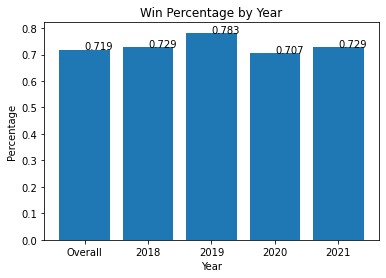

In [46]:
x = ['Overall','2018','2019','2020','2021']
y = [fscore(vco(cg)),fscore(vc(cg,cg.utc_date.str[0:4]=='2018')),fscore(vc(cg,cg.utc_date.str[0:4]=='2019')),fscore(vc(cg,cg.utc_date.str[0:4]=='2020')),fscore(vc(cg,cg.utc_date.str[0:4]=='2021'))]
plt.bar(x,y)
plt.title('Win Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

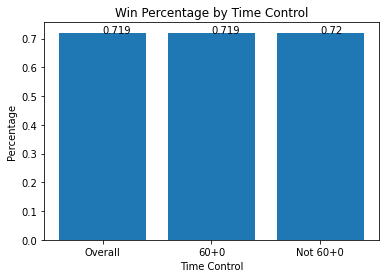

In [48]:
# 85% of games are 60+0, 6% of games are 180+0 and other time controls are even lower, will change or remove
x = ['Overall','60+0','Not 60+0']
y = [fscore(vco(cg)),fscore(vc(cg,cg.time_control=='60+0')),fscore(vc(cg,cg.time_control!='60+0'))]
plt.bar(x,y)
plt.title('Win Percentage by Time Control')
plt.xlabel('Time Control')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

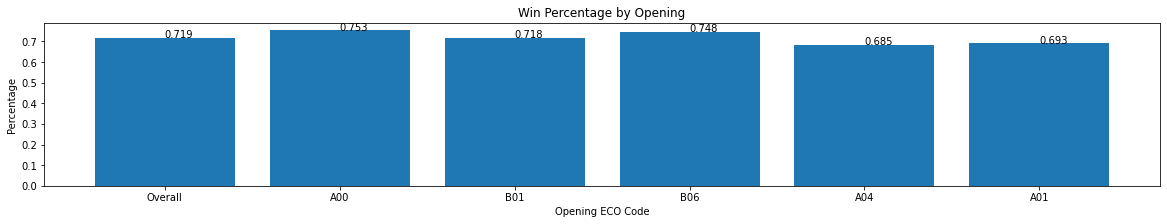

In [113]:
# I think first move might be better but this is a test
x = ['Overall','A00','B01','B06','A04','A01']
y = [fscore(vco(cg)),fscore(cg[cg.eco=='A00'].magnus_result.value_counts()),fscore(cg[cg.eco=='B01'].magnus_result.value_counts()),fscore(cg[cg.eco=='B06'].magnus_result.value_counts()),fscore(cg[cg.eco=='A04'].magnus_result.value_counts()),fscore(cg[cg.eco=='A01'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Opening')
plt.xlabel('Opening ECO Code')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

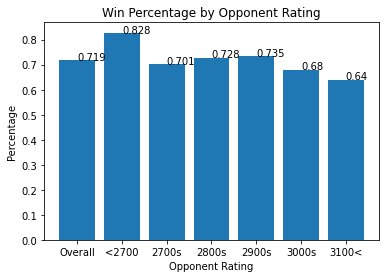

In [56]:
# Each bin has 1600+ games so I'm using these bins.
# x = ['<2700','2700-2800','2800-2900','2900-3000','3000-3100','3100<']
# y = [2141, 1612, 2202, 2488, 3201, 1798]

x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] # Less characters
y = [fscore(vco(cg)),fscore(vc(magoppres,magoppres.opp_elo<2700)),fscore(vc(magoppres,(magoppres.opp_elo<2800) &(magoppres.opp_elo>=2700))),fscore(vc(magoppres,(magoppres.opp_elo<2900) &(magoppres.opp_elo>=2800))),fscore(vc(magoppres,(magoppres.opp_elo<3000) &(magoppres.opp_elo>=2900))),fscore(vc(magoppres,(magoppres.opp_elo<3100) &(magoppres.opp_elo>=3000))),fscore(vc(magoppres,magoppres.opp_elo>=3100))]
plt.bar(x,y)
plt.title('Win Percentage by Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()